# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_rows['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [92]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicated_mouse_id = 'g989'


clean_data = combined_data[combined_data['Mouse ID'] != duplicated_mouse_id]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = clean_data['Mouse ID'].nunique()
new_num_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_data.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Rows by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Rows'>

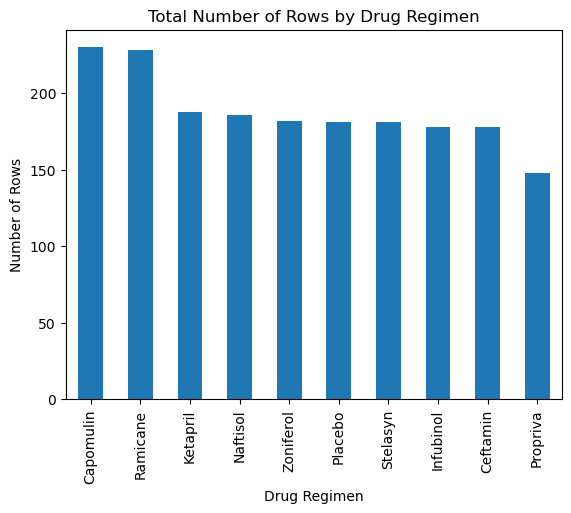

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Plot a bar chart
drug_regimen_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Rows', title='Total Number of Rows by Drug Regimen')


Text(45.597222222222214, 0.5, 'Number of Rows')

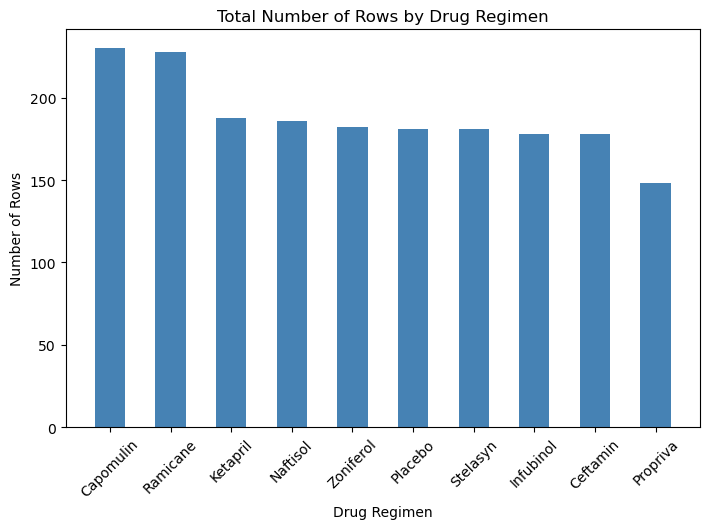

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
row_count = clean_data['Drug Regimen'].value_counts()

plt.figure(figsize=(7,5))
plt.bar(row_count.index, row_count, color='steelblue', width=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Total Number of Rows by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

<Axes: title={'center': 'Distribution of Male vs Female Mouse'}, ylabel='count'>

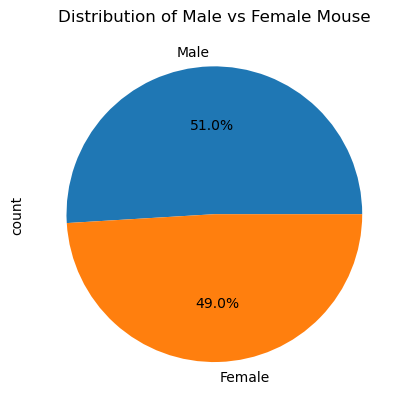

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count=clean_data['Sex'].value_counts()

sex_count.plot(kind='pie', autopct='%1.1f%%', title="Distribution of Male vs Female Mouse")


Text(0.5, 1.0, 'Distribution of Male vs Female Mouse')

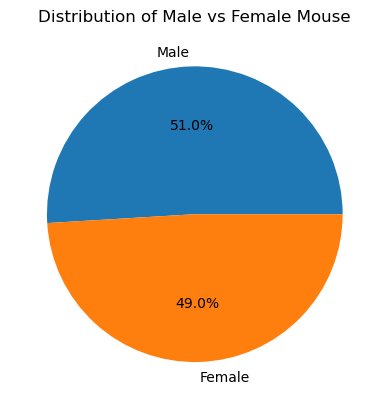

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_data['Sex'].value_counts()

plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title("Distribution of Male vs Female Mouse")

## Quartiles, Outliers and Boxplots

In [182]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimes=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data=clean_data[clean_data['Drug Regimen'].isin(treatment_regimes)]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = filtered_data.groupby('Mouse ID')['Tumor Volume (mm3)'].last()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
super_data = pd.merge(clean_data, final_tumor, on='Mouse ID', suffixes=('', '_final'))
super_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume (mm3)_final
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,62.754451
810,z581,Infubinol,Female,24,25,30,56.286750,2,62.754451
811,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451
812,z581,Infubinol,Female,24,25,40,60.053740,3,62.754451


In [177]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = super_data.loc[super_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data[treatment] = subset
    
    # Determine outliers using upper and lower bounds
    
    Q1=subset.quantile(0.25)
    Q3=subset.quantile(0.75)
    
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    potential_outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    print("Treatment:", treatment )
    print("IQR:", IQR)
    print("Lower Bound", lower_bound)
    print("Upper Bound:", upper_bound)
    print("Potential Outliers:", potential_outliers)

Treatment: Capomulin
IQR: 7.314067135000002
Lower Bound 26.714832162499995
Upper Bound: 55.9711007025
Potential Outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Treatment: Ramicane
IQR: 8.325365415
Lower Bound 24.1865864625
Upper Bound: 57.488048122500004
Potential Outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Treatment: Infubinol
IQR: 10.002090667500006
Lower Bound 32.309217298749985
Upper Bound: 72.31757996875001
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Treatment: Ceftamin
IQR: 9.593010457500007
Lower Bound 32.81891142624998
Upper Bound: 71.19095325625001
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 0, 'treatment')

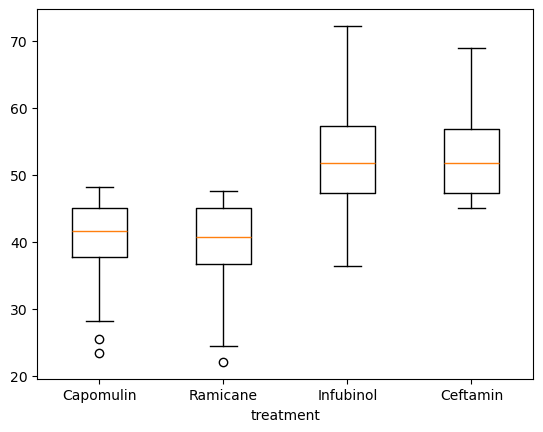

In [179]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data.values(), labels=tumor_vol_data.keys())
plt.xlabel('treatment')

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Timepoint for Mouse s185 treated with Capomulin')

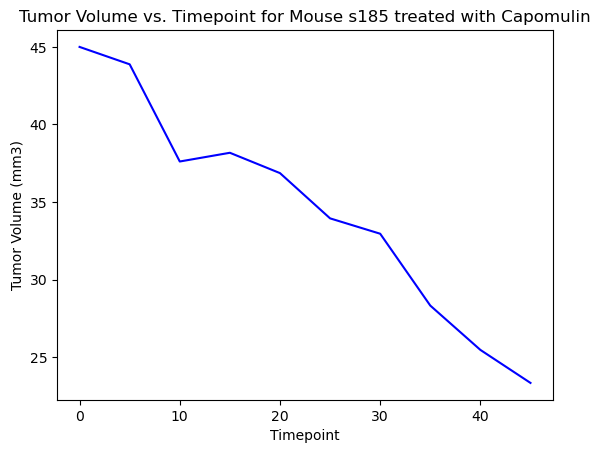

In [191]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = super_data[super_data['Drug Regimen'] == 'Capomulin']
mouse_id = 's185'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Timepoint for Mouse s185 treated with Capomulin")


In [194]:
capomulin_mice = super_data[super_data['Drug Regimen'] == 'Capomulin']

capomulin_mouse_ids = capomulin_mice['Mouse ID'].unique()

print(capomulin_mouse_ids)

['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


Text(0, 0.5, 'Tumor volume (mm3)')

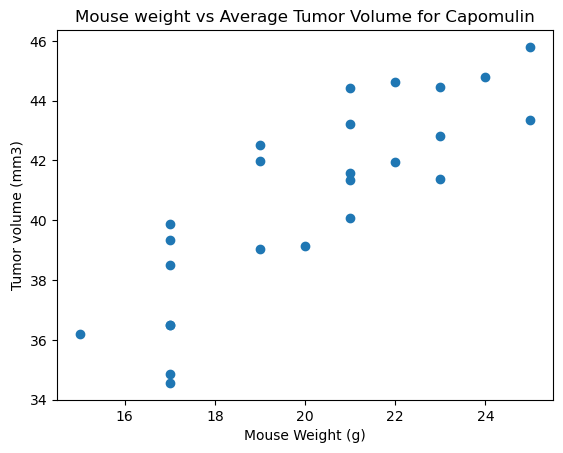

In [203]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = super_data[super_data['Drug Regimen'] == 'Capomulin']

avg_weight_data= capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

avg_tumor_vol= capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(avg_weight_data, avg_tumor_vol)

plt.title("Mouse weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor volume (mm3)")

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume for Capomulin')

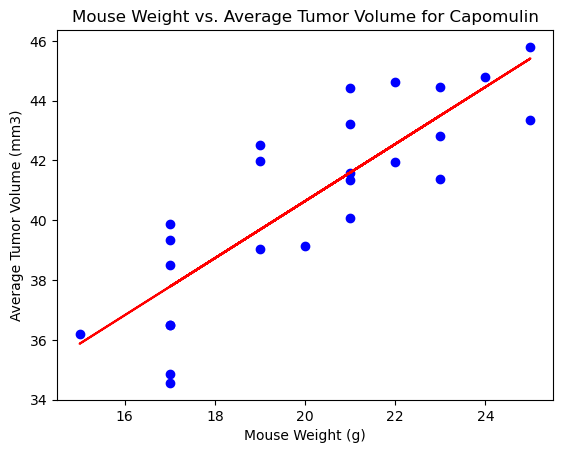

In [205]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

avg_tumor_volume_per_mouse = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

correlation_coefficient, p_value = st.pearsonr(mouse_weight, avg_tumor_volume_per_mouse)
print("Correlation Coefficient:", correlation_coefficient)

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, avg_tumor_volume_per_mouse)

plt.scatter(mouse_weight, avg_tumor_volume_per_mouse, color='blue')

plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
